# Ensemble Model

- 동일한 혹은 상이한 모형들을 종합하여 최종적인 의사결정에 활용하는 모델
- 모델의 편향(bias)과 분산(variance)를 낮추는데 도움
- 블랙박스 모델로 해석이 어려움

## 1. RandomForest & Bagging


- Bootstrap (샘플링기법)
    - 모집단에서 독립적인 데이터 셋을 반복하여 얻지 않고, 원래의 데이터 셋으로부터 관측치를 반복적으로 추출(반복 복원 추출)
    - 데이터 양이 작아도 데이터의 양을 임의적으로 늘려서 모델을 사용할 수 있음
    - 데이터의 분포가 고르지 않을 때 고르게 만드는 효과

- Bagging ( Bootstrap aggregating)
    - Bootstrap => 반복 복원 추출하고, aggregating => 총액을 내라.
    - input에 대한 Bootstrap 후, Decision Tree를 생성하고 이에 대한 평균값만을 활용
    - 임의의 새로운 데이터 x가 나타났을 때, regression(회귀)의 문제면 평균을 내고 classification(분류)의 문제면 voting 다수결로 분류
    - Tree에서 활용되는 독립변수 선정에 대한 고민 없이 모든 독립변수를 그대로 반복 사용해서 Decision Tree를 만들어서 높은 Correlation
    - 블랙박스 모형이기 때문에 과정을 해석이 어려움
    - 원래 데이터에 대해서 여러개의 작은 데이터셋 N개를 샘플링
    - 데이터를 작은 모델 N개로 학습
    - 학습된 N개의 모델을 모두 하나로 합쳐서 최종적인 모델 
    - 모델의 분산을 줄일 수 있는 앙상블 기법

- RandomForest
    - 동일한 하나의 데이터 집합에서 임의복원 샘플링을 통해 여러 개의 훈련용 데이터를 생성
    - 여러 번의 학습을 통해 여러 개의 트리를 생성하고, 이를 결합하여 최종적으로 목표변수를 예측


- Boosting
    - 데이터 중에서 에러가 크고 학습이 제대로 되지 않은 데이터들에 대해 가중치를 부여한 후 새로운 간단한 모델로 다시 학습
    - 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리 생성
    - 순차적으로 학습을 진행하여, 마지막에는 그동안 학습된 모델들을 모아서 최종적인 모델
    - bagging에 비해서 상대적으로 속도가 많이 느리다. 그 전 모델의 학습이 끝나야 다음 모델학습이 가능하기 때문
    - 모델의 분산을 줄이고 편향을 많이 개선할 수 있다.

- 참고 용어
    - variance : 모델 결과의 일관성이 낮은 상태로 variance 가 높으면 과대적합된 상태
    - bias : 편향값 = 예측정확성으로 볼 수 있고 bias가 높으면 과소적합된 상태
    - error = bias + variance

In [2]:
# 라이브러리 불러오기
# data : 랜덤값 데이터
# target : 0,1로 이루어진 데이터
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

In [3]:
# make_moons 라이브러리를 이용한 샘플 데이터 생성
# 데이터 개수 : 10000
# noise = 0.25
x, y = make_moons(n_samples=10000, noise=0.25)

In [5]:
y

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [6]:
# 학습/테스트용 데이터 분리
from sklearn.model_selection import train_test_split

In [7]:
# 8:2
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2)

In [8]:
# 랜덤포레스트 객체 생성
rf = RandomForestClassifier()

In [9]:
# 모델 학습
rf.fit(train_x, train_y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# 테스트용 데이터로 모델 검증(정확도 평가)
rf.score(test_x, test_y)

0.93

In [11]:
# 예측값
rf.predict(test_x)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [12]:
test_y

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

# 2. Gradient Boosting

- 오류를 최소화하기 위한 경사 하강법을 이용한 기법
- bias를 감소시키고 예측 성능이 높다고 평가됨
- 블랙박스 모델로 해석력이 떨어짐
- learning_rate 파라미터가 너무 작으면 과적합 또는 너무 크면 발산(step_size)의 가능성이 있음
- 연산 비용 측면에서 비효율 적인 단점

In [13]:
# 모델 라이브러리
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# 부스팅 객체 생성
gbc = GradientBoostingClassifier()

In [15]:
# 학습
gbc.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [17]:
# randomforest => 0.93
# 평가
gbc.score(test_x, test_y)

0.942

# 3. XGBoost 사용하기

- Gradient Boosting 구현한 알고리즘
- Decision Tree를 구성할 때 병렬 처리 기법을 사용해서, 수행시간 측면에서 Gradient Boost보다 비약적인 향상

In [19]:
# 라이브러리 설치하기 : pip install xgboost
# 라이브러리 불러오기
from xgboost import XGBClassifier

In [20]:
# 객체 생성
xgb = XGBClassifier()

In [21]:
# 학습
xgb.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [22]:
# rf : 0.93
# gbc : 0.942
# 평가
xgb.score(test_x, test_y)

0.942

In [23]:
# 변수 중요도 시각화를 위한 라이브러리
from xgboost import plot_importance

In [25]:
%matplotlib inline

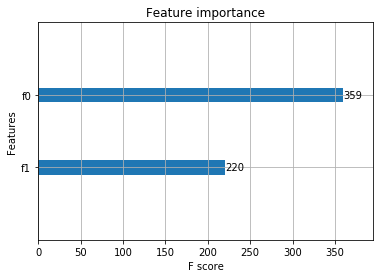

In [26]:
# feature_importance 시각화
plot_importance(xgb)